In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Zadanie 1

In [67]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [68]:
#1
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [69]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


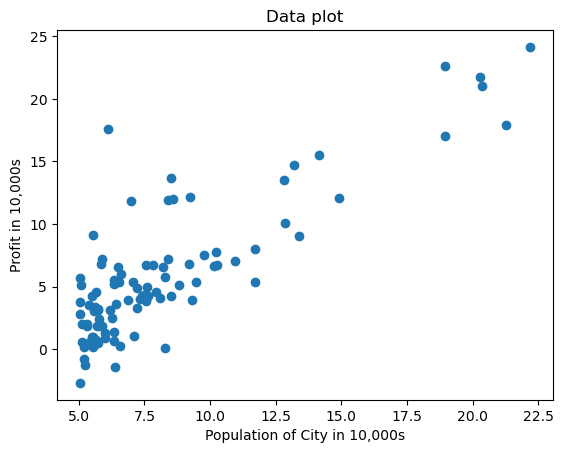

In [70]:
#2
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x,y)
plt.title('Data plot')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000s')
plt.show()

In [71]:
#3 i 4
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [72]:
#5
def calculate_h(X, theta):
    h = np.transpose(theta) @ X
    return h

def computeCost(X, y, theta):
    h = calculate_h(X, theta)
    cost = ((h-y) ** 2).sum() / (X.shape[1] * 2)
    return cost

In [73]:
#6
print(round(computeCost(X, y, theta), 2))

32.07


In [74]:
#7
def simple_gradient(X, y, theta, alpha=0.01, it=1000):
    cost = []
    for i in range(it):
        h0 = calculate_h(X, theta)
        theta[0,0] = theta[0,0] - alpha* (1/X.shape[1]) * np.sum(h0-y)
        theta[1,0] = theta[1,0] - alpha* (1/X.shape[1]) * np.sum((h0-y)*X[1,:])
        cost.append(computeCost(X, y, theta))
  
    return theta, cost

In [75]:
#8 i 9
theta, cost = simple_gradient(X,y,theta)
print(f'Theta: {theta}')
cost_opt = computeCost(X, y, theta)
print(f'Optimal cost: {cost_opt}')

Theta: [[-3.2414012]
 [ 1.1272942]]
Optimal cost: 4.515955615224579


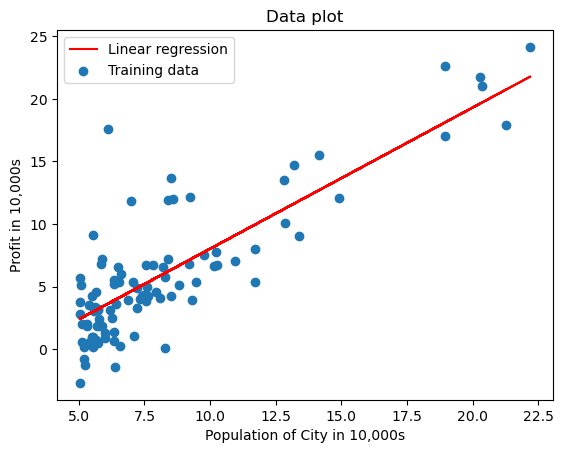

In [76]:
#10
plt.plot(x, calculate_h(X, theta)[0], 'r', label='Linear regression')
plt.scatter(x,y, label='Training data')

plt.title('Data plot')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000s')
plt.legend()
plt.show()

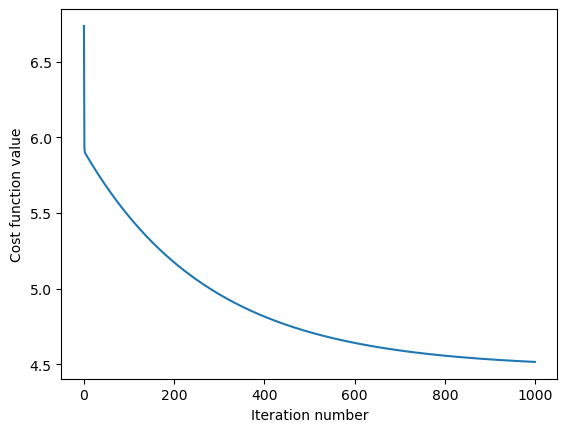

In [77]:
#11
x_cost= np.arange(0, len(cost), 1)
plt.plot(x_cost, cost)
plt.ylabel('Cost function value')
plt.xlabel('Iteration number')
plt.show()

### Zadanie 2

In [130]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [131]:
#1
data2 = (data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [132]:
#2
x0 = data2.values[:,0]
x1 = data2.values[:,1]
y = data2.values[:,2]

In [133]:
#3 i 4
X = np.stack([np.ones(x0.shape, dtype=np.float32), x0, x1], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [134]:
#6
print(round(computeCost(X, y, theta), 2))

0.49


In [137]:
def simple_gradient(X, y, theta, alpha=0.01, it=1000):
    cost=[]
    for i in range(it):
        theta = theta - alpha*((calculate_h(X, theta)-y)@X.T).T/X.shape[1]
        cost.append(computeCost(X,y,theta))
    return theta, cost

In [138]:
#8 i 9
theta, cost = simple_gradient(X,y,theta)
print(f'Theta: {theta}')
cost_opt = computeCost(X, y, theta)
print(f'Optimal cost: {cost_opt}')

Theta: [[-1.10980964e-16]
 [ 8.78503652e-01]
 [-4.69166570e-02]]
Optimal cost: 0.13070336960771892


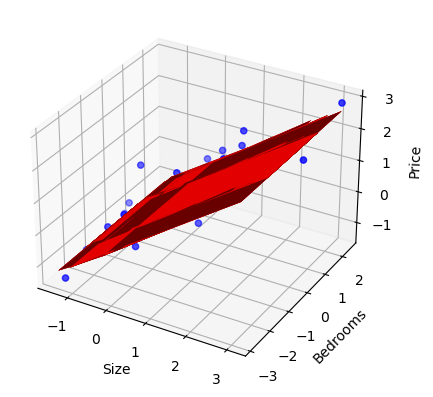

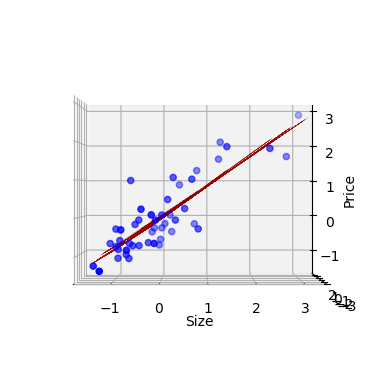

In [139]:
#10
h = calculate_h(X, theta)

plt.figure()
x0grid, x1grid = np.meshgrid(x0,x1)
ax = plt.axes(projection='3d')
ax.plot_surface(x0grid,x1grid,h,color='r')
ax.scatter3D(x0,x1,y,color='b')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x0grid,x1grid,h,color='r')
ax.scatter3D(x0,x1,y,color='b')
ax.view_init(0,-90)
ax.set_xlabel('Size')
ax.set_zlabel('Price')
plt.show()

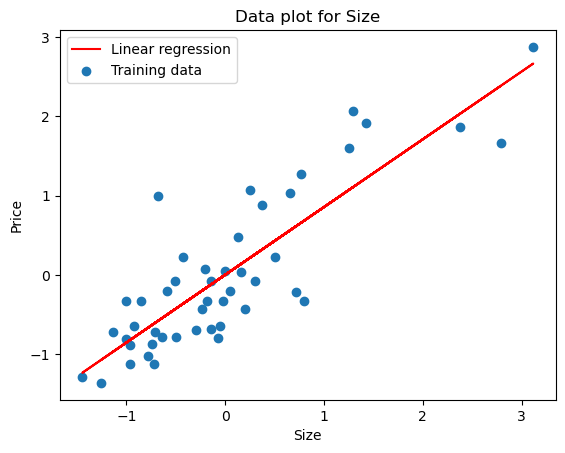

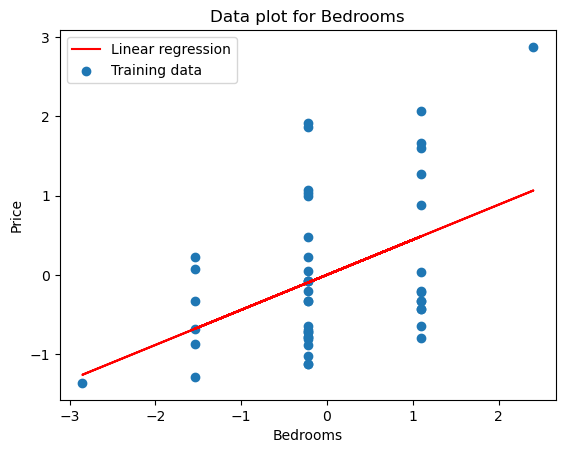

In [141]:
X0 = np.stack([np.ones(x0.shape, dtype=np.float32), x0], axis=0)
X1 = np.stack([np.ones(x1.shape, dtype=np.float32), x1], axis=0)
theta0 = np.zeros((X0.shape[0], 1), dtype=np.float32)
theta1 = np.zeros((X1.shape[0], 1), dtype=np.float32)
theta0, cost0 = simple_gradient(X0,y,theta0)
theta1, cost1 = simple_gradient(X1,y,theta1)

plt.plot(x0, calculate_h(X0, theta0)[0], 'r', label='Linear regression')
plt.scatter(x0,y, label='Training data')
plt.title('Data plot for Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.plot(x1, calculate_h(X1, theta1)[0], 'r', label='Linear regression')
plt.scatter(x1,y, label='Training data')
plt.title('Data plot for Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.show()

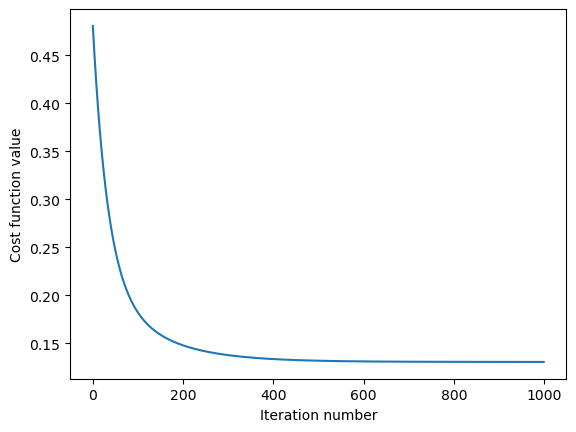

In [116]:
#11
x_cost= np.arange(0, len(cost), 1)
plt.plot(x_cost, cost)
plt.ylabel('Cost function value')
plt.xlabel('Iteration number')
plt.show()

### Zadanie 3

In [38]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

# Normalization
#data = (data2-data.mean())/data.std()
x = data.values[:, 0].reshape(-1,1)
y = data.values[:, 1].reshape(-1,1)

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=0)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [[1.19869775]]
Residual sum of squares: 9.097634202063354


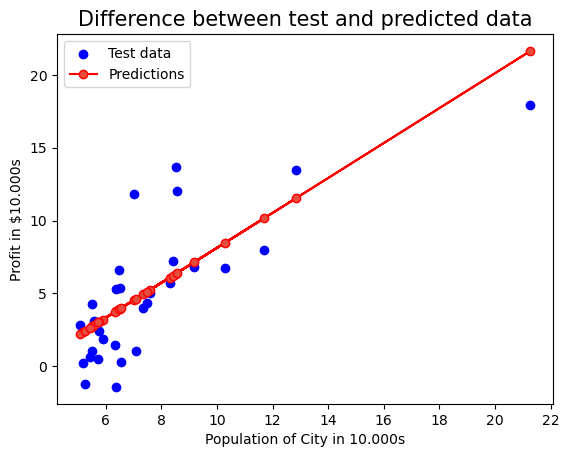

In [39]:
fig, ax = plt.subplots()
plt.scatter(X_test, Y_test, color='b', label="Test data")
plt.plot(X_test, Y_predicted, color="r", marker='o', markerfacecolor="#e74c3c" , label="Predictions")
plt.title("Difference between test and predicted data", fontsize=15)
plt.xlabel("Population of City in 10.000s")
plt.ylabel("Profit in $10.000s")
plt.legend()
plt.show()